In [175]:
import pandas as pd
data = pd.read_csv("Mall_Customers.csv")
data.sample(6)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
71,72,Female,47,49,42
146,147,Male,48,77,36
166,167,Male,42,86,20
26,27,Female,45,28,32
51,52,Male,33,42,60
171,172,Male,28,87,75


In [176]:
data = data[["Annual Income (k$)","Spending Score (1-100)"]]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [177]:
data = data.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'})
data.sample(5)

,income,score
14,20,13
83,54,44
77,54,48
60,46,56
163,81,93


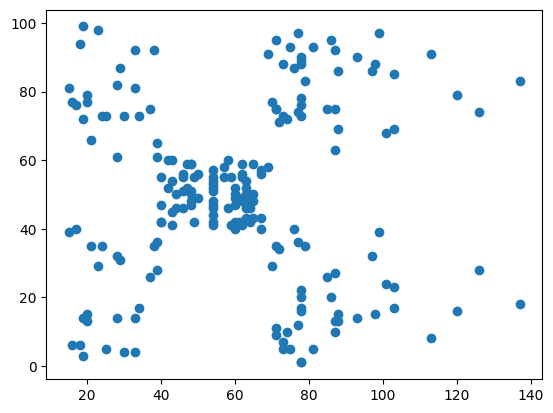

In [178]:
import matplotlib.pyplot as plt
plt.scatter(data['income'], data['score'])

In [179]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
wcss_error = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income', 'score']])
    wcss_error.append(model.inertia_)

In [180]:
wcss_error

[269981.28,
 181363.59595959596,
 132485.3805668016,
 73880.64496247195,
 44454.47647967974,
 37455.98455516028,
 33642.579220779226,
 25388.760028179364,
 21829.13563877983,
 22428.000111389585,
 17880.234928625865,
 16682.2355229328,
 14842.358022071308,
 14862.430386223237,
 13043.10808063812,
 11846.92416302308]

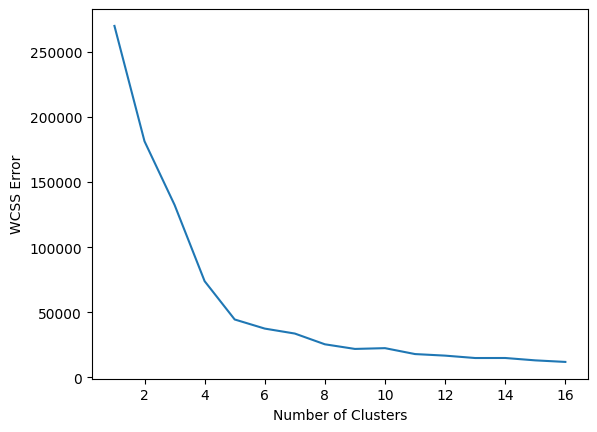

In [181]:
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Error')
plt.plot(k_values, wcss_error)

In [182]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
predict = model.fit_predict(data)
predict

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [183]:
data.head()

,income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [184]:
data['cluster'] = predict
data.head()

,income,score,cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


In [185]:
c0 = data[data['cluster'] == 0]
c1 = data[data['cluster'] == 1]
c2 = data[data['cluster'] == 2]
c3 = data[data['cluster'] == 3]
c4 = data[data['cluster'] == 4]

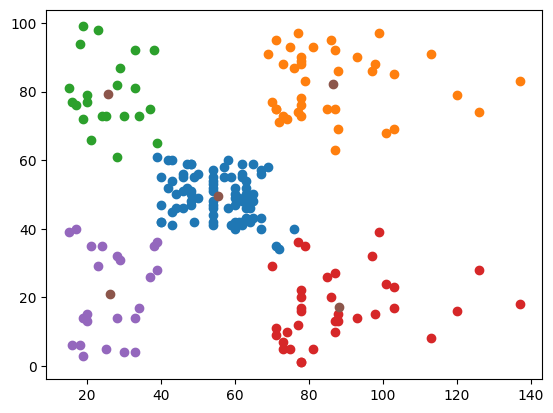

In [193]:
plt.scatter(c0['income'], c0['score'])
plt.scatter(c1['income'], c1['score'])
plt.scatter(c2['income'], c2['score'])
plt.scatter(c3['income'], c3['score'])
plt.scatter(c4['income'], c4['score'])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1])

In [188]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])